In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#  Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Classification Algorithms Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron 
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

# Metrics Libraries
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print(*df.columns,sep='\n')

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


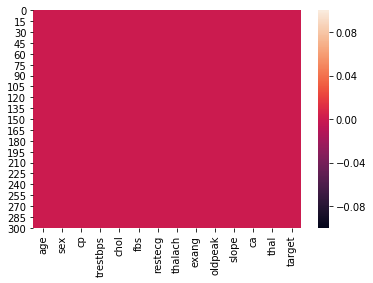

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.duplicated().sum()

1

In [10]:
# Explorartory Data Analysis

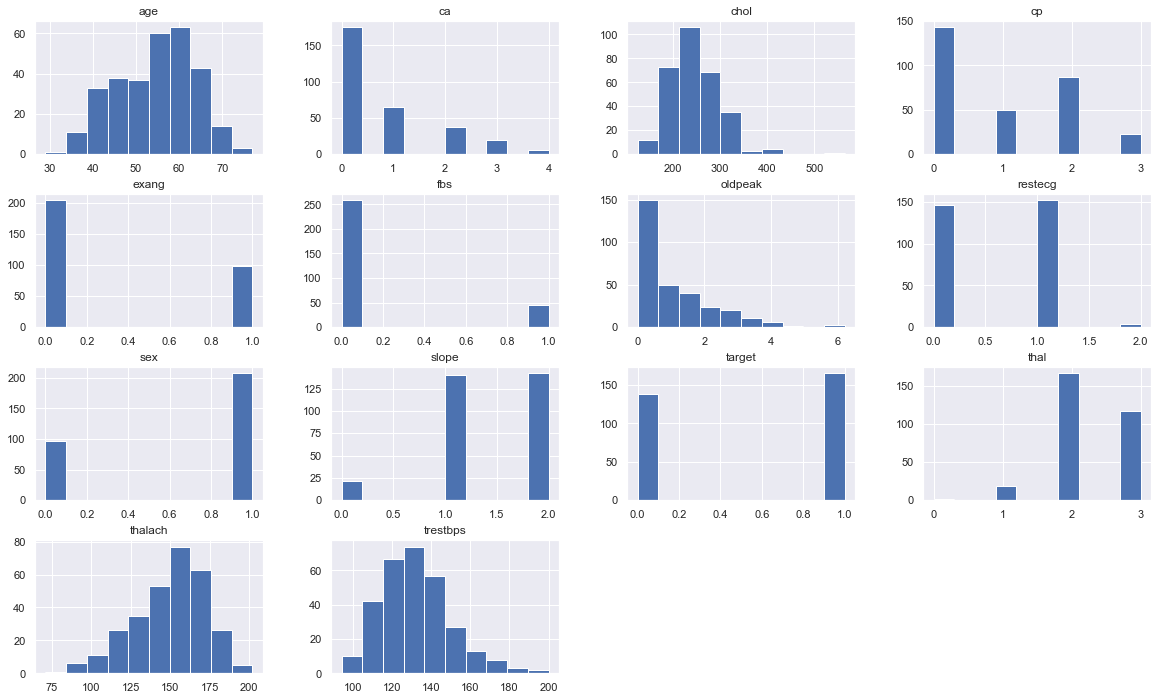

In [11]:
sns.set()
df.hist(figsize=(20,12))
plt.show()

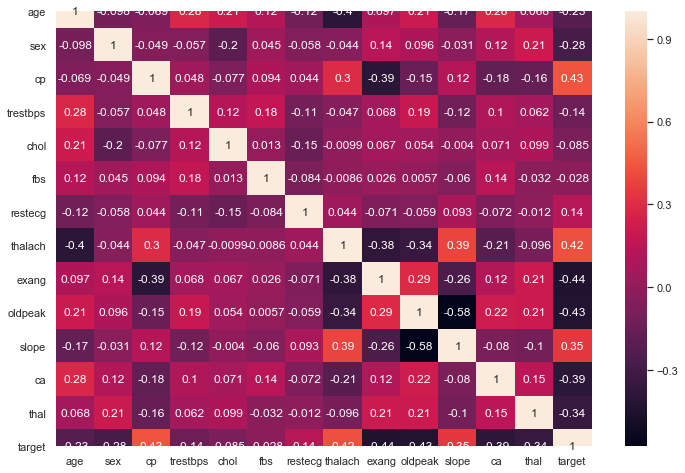

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

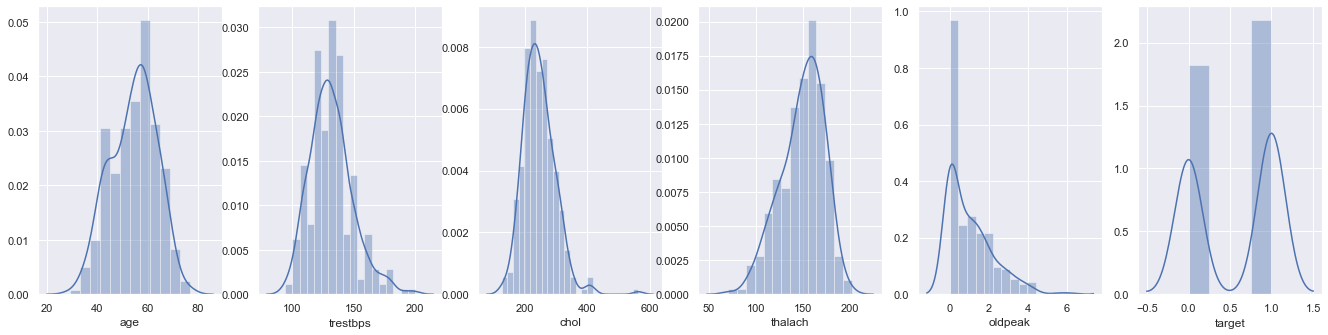

In [13]:
continuous_variables= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
number_of_columns = len(continuous_variables)
number_of_rows = 2
plt.figure(figsize=(23, 18))

for i, f in enumerate(continuous_variables):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sns.distplot(df[f], kde=True)

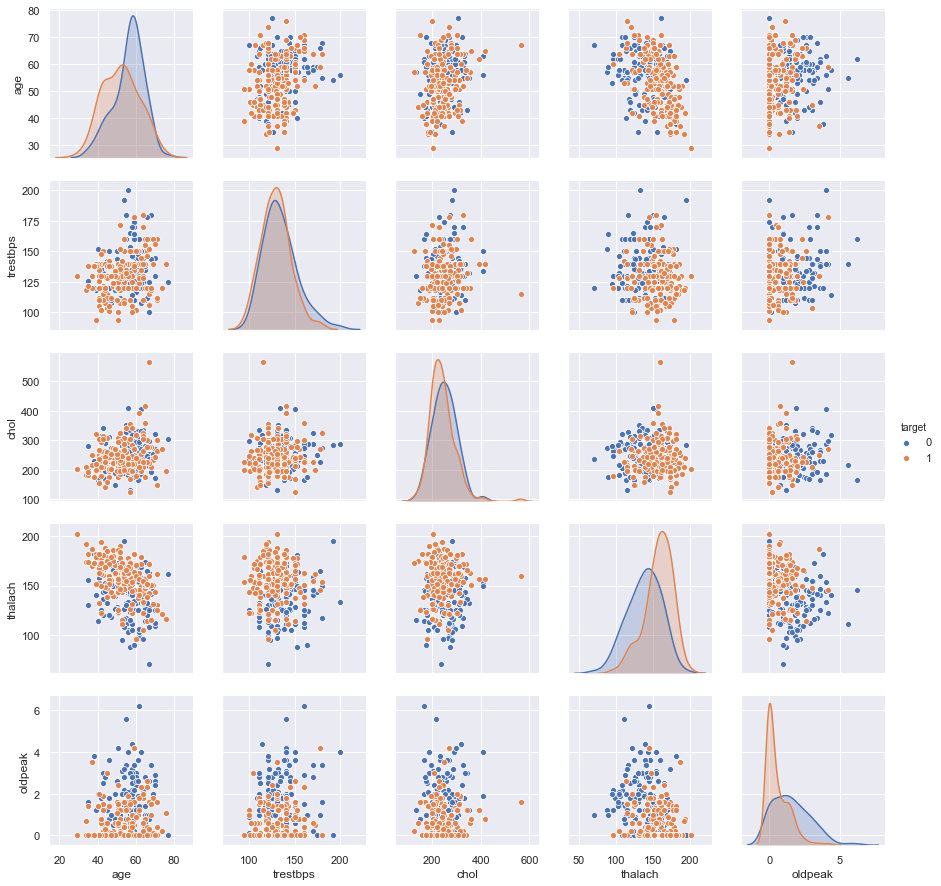

In [14]:
sns.pairplot(df,vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'],hue='target')

In [15]:
y=df.target
x=df.drop('target',axis=1)

In [16]:
y.shape,x.shape

((303,), (303, 13))

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)

In [18]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [19]:
# Logistic Regression

In [20]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred=logreg.predict(x_test)
print('Accuracy Score of LogisticRegression:',accuracy_score(y_test,logreg_pred))
confusion_matrix(y_test,logreg_pred)

Accuracy Score of LogisticRegression: 0.8524590163934426


array([[24,  4],
       [ 5, 28]], dtype=int64)

In [21]:
# Linear Supoort Vector Classifer
lsvc=LinearSVC(dual=False)
lsvc.fit(x_train,y_train)
lsvc_pred=lsvc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,lsvc_pred))
confusion_matrix(y_test,lsvc_pred)

Accuracy Score: 0.8524590163934426


array([[24,  4],
       [ 5, 28]], dtype=int64)

In [22]:
# Support Vector Machines

In [23]:
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
print('Accuracy Score of Support Vector Classifier :',accuracy_score(y_test,svc_pred))
confusion_matrix(y_test,svc_pred)

Accuracy Score of Support Vector Classifier : 0.8360655737704918


array([[24,  4],
       [ 6, 27]], dtype=int64)

In [24]:
# Perceptron

In [25]:
per=Perceptron()
per.fit(x_train,y_train)
per_pred=per.predict(x_test)
print('Accuracy Score of Perceptron :',accuracy_score(y_test,per_pred))
confusion_matrix(y_test,per_pred)

Accuracy Score of Perceptron : 0.7540983606557377


array([[21,  7],
       [ 8, 25]], dtype=int64)

In [26]:
#K-Nearest Neighbors Classifier

In [27]:
knn=GridSearchCV(estimator=KNeighborsClassifier(),
                param_grid={'n_neighbors':[2,3,4]},cv=10).fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print('Accuracy of k-Nearest Neighbor Classifier: ',accuracy_score(y_test,knn_pred))
confusion_matrix(y_test,knn_pred)

Accuracy of k-Nearest Neighbor Classifier:  0.8032786885245902


array([[23,  5],
       [ 7, 26]], dtype=int64)

In [28]:
# Naive Bayes Classifier

In [29]:
gaussian=GaussianNB()
gaussian.fit(x_train,y_train)
gaussian_pred=gaussian.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,gaussian_pred))
confusion_matrix(y_test,gaussian_pred)

Accuracy Score: 0.819672131147541


array([[25,  3],
       [ 8, 25]], dtype=int64)

In [30]:
# Stochastic Gradient Descent

In [31]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
sgd_pred=sgd.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,sgd_pred))
confusion_matrix(y_test,sgd_pred)

Accuracy Score: 0.7213114754098361


array([[23,  5],
       [12, 21]], dtype=int64)

In [32]:
#Decision Tree Classifier

In [33]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,dt_pred))
confusion_matrix(y_test,dt_pred)

Accuracy Score:  0.7868852459016393


array([[23,  5],
       [ 8, 25]], dtype=int64)

In [34]:
# Random Forest Classifier

In [35]:
rf=GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators':[100,300]},cv=5).fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,rf_pred))
confusion_matrix(y_test,rf_pred)

Accuracy Score: 0.8360655737704918


array([[26,  2],
       [ 8, 25]], dtype=int64)

In [36]:
# XGBoost Classifier

In [37]:
xgb=XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42, eval_metric=["auc", "error", "error@0.6"])
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,xgb_pred))
confusion_matrix(y_test,xgb_pred)

Accuracy Score: 0.8524590163934426


array([[25,  3],
       [ 6, 27]], dtype=int64)

In [38]:
#LGBM Classifier

In [39]:
lgb=LGBMClassifier()
lgb.fit(x_train,y_train)
lgb_pred=lgb.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,lgb_pred))
confusion_matrix(y_test,lgb_pred)

Accuracy Score: 0.8032786885245902


array([[21,  7],
       [ 5, 28]], dtype=int64)

In [40]:
# RidgeClassifier

In [41]:
rg=RidgeClassifier()
rg.fit(x_train,y_train)
rg_pred=rg.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,rg_pred))
confusion_matrix(y_test,rg_pred)

Accuracy Score:  0.8688524590163934


array([[24,  4],
       [ 4, 29]], dtype=int64)